In [11]:
from pathlib import Path
from IPython.display import HTML, display
css = Path("../../../css/rtl.css").read_text(encoding="utf-8")
display(HTML(f"<style>\n{css}\n</style>"))

# فصل ۱ — مقدمه‌ای بر یادگیری ماشین 
# درس ۱: یادگیری ماشین چیست؟

**دوره:** دوره مقدماتی یادگیری ماشین  
**فصل:** ۱ (مقدمه‌ای بر یادگیری ماشین)  
**درس:** ۱ (یادگیری ماشین چیست؟)

---

## اهداف یادگیری

در پایان این درس، قادر خواهید بود:

- «یادگیری ماشین» را به‌صورت دقیق تعریف کنید و آن را از برنامه‌نویسی مبتنی بر قوانین تمایز دهید.
- ایدهٔ اصلی **یادگیری یک تابع از داده** و دلیل اینکه **تعمیم‌پذیری** هدف مرکزی است را توضیح دهید.
- خانواده‌های اصلی وظایف ML (طبقه‌بندی، رگرسیون، خوشه‌بندی) را تشخیص دهید و آن‌ها را به مثال‌های واقعی نگاشت کنید.
- یک جریان کاری حداقلی ML را در پایتون پیاده‌سازی کنید: بارگذاری داده، تقسیم، پیش‌پردازش، آموزش و ارزیابی.
- خطاهای رایج در پروژه‌های ابتدایی را بشناسید: نشت داده، بیش‌برازش، و بهداشت ضعیف ارزیابی.

> **نکتهٔ مخزن (مسیرها):** این نوت‌بوک مطابق ساختار مخزن شما طراحی شده است.  
> مسیرهای داده به صورت **نسبی** نوشته شده‌اند؛ مانند: `../../../Datasets/Classification/iris.csv`.  
> اگر فایل CSV هنگام اجرا موجود نباشد، نوت‌بوک به‌صورت خودکار از نمونهٔ کوچکِ تعبیه‌شده (بر اساس «سطرهای ابتدایی» ارائه‌شده)
> استفاده می‌کند تا همهٔ مثال‌ها قابل اجرا باشند.


## فهرست مطالب (نمای کلی)

۱. تعریف مرکزی: «یادگیری از داده»  
۲. تفاوت ML با برنامه‌نویسی کلاسیک  
۳. نظارت‌شده در برابر بدون‌نظارت: نگاه عمل‌گرایانه  
۴. چرا تعمیم‌پذیری مهم است (و بیش‌برازش چیست)  
۵. یک جریان کاری حداقلی ML (با مثال‌های قابل اجرا)  
   - مینی‌پروژهٔ طبقه‌بندی (دادهٔ انتخاب‌شده به‌صورت تصادفی)  
   - مینی‌پروژهٔ رگرسیون (دادهٔ انتخاب‌شده به‌صورت تصادفی)  
   - مینی‌پروژهٔ خوشه‌بندی (دادهٔ انتخاب‌شده به‌صورت تصادفی)  
۶. مبانی بازتولیدپذیری (بذر تصادفی، تقسیم داده، و مستندسازی)  
۷. جمع‌بندی و تمرین‌ها


## ۱. تعریف مرکزی: «یادگیری از داده»

یادگیری ماشین زیرشاخه‌ای از هوش مصنوعی است که بر **ساخت سامانه‌هایی تمرکز دارد که با تجربه، عملکردشان روی یک وظیفه بهتر می‌شود**.

یک تعریف فشرده و کاربردی که در عمل زیاد استفاده می‌شود:

- ما **داده** $X$ (ویژگی‌ها، ورودی‌ها) را مشاهده می‌کنیم.
- (گاهی) **اهداف** $y$ (برچسب‌ها، خروجی‌ها) را مشاهده می‌کنیم.
- یک **کلاس مدل** $\mathcal{F}$ انتخاب می‌کنیم (مثل مدل‌های خطی، درخت‌ها، کرنل‌ها).
- یک **تابع زیان** $\ell$ برای اندازه‌گیری خطا انتخاب می‌کنیم.
- با کمینه‌سازی زیان تجربی (به‌همراه منظم‌سازی) تابعی $f \in \mathcal{F}$ را برازش می‌کنیم.

در بسیاری از پروژه‌های مقدماتی، مسئله این است:  
> «با داشتن مثال‌های تاریخی، قاعده‌ای بیاموزید که روی مثال‌های *آینده* پیش‌بینی خوبی بدهد.»

مهم‌ترین عبارت همین «مثال‌های آینده» است. ML دربارهٔ حفظ کردن داده نیست؛ دربارهٔ یادگیری الگویی است که به داده‌های جدید
**تعمیم** یابد.

### یک مدل ذهنی مفید

می‌توانید ML را این‌گونه ببینید:

- **جست‌وجو:** پیدا کردن پارامترهایی که مدل را با داده سازگار می‌کند.
- **استقرا:** استنتاج یک قاعدهٔ کلی از تعداد محدودی مشاهده (که ذاتاً نامطمئن است).
- **بهینه‌سازی:** کمینه‌سازی یک هدف عددی.
- **آمار:** استدلال تحت عدم قطعیت دربارهٔ اینکه مدل بیرون از دادهٔ آموزشی چقدر خوب کار می‌کند.

در این درس، نگاه عملیِ رایج در صنعت را پررنگ می‌کنیم: ساخت یک سامانهٔ پیش‌بینی با عملکرد قابل اندازه‌گیری و پروتکل ارزیابی دقیق.


## ۲. یادگیری ماشین در برابر برنامه‌نویسی مبتنی بر قوانین

در برنامه‌نویسی کلاسیک، شما منطق را صریح می‌نویسید:

- ورودی: داده
- برنامه: قوانین دست‌نویس
- خروجی: تصمیم

در ML، شما «فرآیند یادگیری» را می‌نویسید:

- ورودی: داده **به‌همراه مثال‌هایی از پاسخ درست** (در یادگیری نظارت‌شده)
- برنامه: الگوریتمی که **مدل را از روی داده برازش می‌کند**
- خروجی: یک مدلِ یادگرفته‌شده که پیش‌بینی می‌کند

### چرا این تفاوت مهم است؟

مسائل دنیای واقعی اغلب سیگنال‌های پیچیده و پر‌بُعد دارند:

- تصویر: میلیون‌ها پیکسل؛ قوانین شکننده‌اند.
- متن: ابهام و زمینه؛ قوانین ناقص‌اند.
- دادهٔ جدولی کسب‌وکار: عوامل تعاملی؛ قوانین با زمان تغییر می‌کنند.

ML تلاش را از «نوشتن قوانین» به این موارد منتقل می‌کند:

- جمع‌آوری/پاک‌سازی داده،
- انتخاب کلاس مدل،
- ارزیابی صحیح،
- تکرار بر اساس شواهد.

اما هزینه هم دارد: سامانه‌های ML معمولاً **احتمالی** هستند، ممکن است بی‌صدا خطا کنند، و باید با دقت اعتبارسنجی شوند.


## ۳. نظارت‌شده در برابر بدون‌نظارت (نگاه عمل‌گرایانه)

طبقه‌بندی‌های مختلفی وجود دارد. برای شهود عملی:

### یادگیری نظارت‌شده
ورودی \(X\) و هدف \(y\) دارید. سامانه یاد می‌گیرد \(y\) را از روی \(X\) پیش‌بینی کند.

وظایف رایج:
- **طبقه‌بندی:** پیش‌بینی یک دسته (مثلاً «Diabetic» در برابر «Non-Diabetic»).
- **رگرسیون:** پیش‌بینی یک مقدار عددی (مثلاً قیمت خانه).

### یادگیری بدون‌نظارت
ورودی \(X\) دارید ولی هدف \(y\) ندارید. سامانه سعی می‌کند ساختار را کشف کند.

وظایف رایج:
- **خوشه‌بندی:** گروه‌بندی موارد مشابه (مثلاً بخش‌بندی مشتریان).
- **کاهش بُعد:** فشرده‌سازی اطلاعات (مثلاً PCA).

### نیمه‌نظارت‌شده و یادگیری تقویتی
- نیمه‌نظارت‌شده: بخشی از داده برچسب دارد و بخش بزرگی بدون برچسب است.
- تقویتی: یادگیری از طریق آزمون‌وخطا و پاداش.

در این درس، روی سه خانوادهٔ «اولین برخورد» تمرکز می‌کنیم: طبقه‌بندی، رگرسیون، و خوشه‌بندی.


## ۴. تعمیم‌پذیری و بیش‌برازش: ایدهٔ مرکزی

اگر ML یک «مفهوم مرکزی» داشته باشد، آن مفهوم **تعمیم‌پذیری** است:

> یک مدل زمانی مفید است که روی داده‌هایی که قبلاً ندیده نیز خوب عمل کند.

### خطای آموزش در برابر خطای آزمون
- **خطای آموزش** نشان می‌دهد مدل چقدر دادهٔ آموزش را خوب برازش کرده است.
- **خطای آزمون** تخمینی از عملکرد روی دادهٔ جدید است.

یک مدل انعطاف‌پذیر می‌تواند خطای آموزش را خیلی کم کند، اما ممکن است «نویز» را هم یاد بگیرد.  
این همان **بیش‌برازش** است: یادگیری الگوهایی که در داده‌های جدید تکرار نمی‌شوند.

### شهود بایاس–واریانس (غیررسمی)
- مدل‌های با بایاس بالا خیلی ساده‌اند: کم‌برازش می‌کنند.
- مدل‌های با واریانس بالا خیلی حساس‌اند: بیش‌برازش می‌کنند.

پیام عملی از همین ابتدا:

۱. همیشه داده را نگه‌دارید (یا از اعتبارسنجی متقاطع استفاده کنید).  
۲. هیچ‌وقت روی دادهٔ آزمون «تنظیم» انجام ندهید.  
۳. قبل از مدل‌های پیچیده، ابتدا خط‌پایه‌های ساده را امتحان کنید.


## ۵. مثال‌های قابل اجرا (Hands-on)

این بخش عمداً عملی است. ما:

- یک نمایش سریعِ مصنوعی از «یادگیری از داده» اجرا می‌کنیم.
- به‌صورت تصادفی از میان داده‌های جدولیِ موجود در ساختار مخزن شما انتخاب می‌کنیم و سه جریان کاری اجرا می‌کنیم:
  - طبقه‌بندی،
  - رگرسیون،
  - خوشه‌بندی.

کد به گونه‌ای نوشته شده است که:
- برای مبتدی‌ها خوانا باشد،
- بازتولیدپذیر باشد (بذرهای ثابت)،
- در نبود فایل CSV محلی نیز اجرا شود (نمونهٔ داده تعبیه شده است).


## آماده‌سازی محیط

ابتدا کتابخانه‌های رایج را وارد می‌کنیم و یک seed بازتولیدپذیر تنظیم می‌کنیم.


In [2]:
import sys, platform
import numpy as np
import pandas as pd
from pathlib import Path
from io import StringIO

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Deterministic seed based on (chapter, lesson)
CHAPTER = 1
LESSON = 1
SEED = CHAPTER * 1000 + LESSON
rng = np.random.default_rng(SEED)

print("Python:", sys.version.split()[0], "| Platform:", platform.platform())
print("NumPy:", np.__version__, "| Pandas:", pd.__version__)


Python: 3.11.2 | Platform: Linux-4.4.0-x86_64-with-glibc2.36
NumPy: 1.24.0 | Pandas: 2.2.3


## نمایش مصنوعی سریع

یک مثال کوچک برای نشان دادن ایدهٔ یادگیری یک قاعده از مشاهده‌های نویزی.


Learned slope: 2.0027082764792468
Learned intercept: -0.9996730763597736


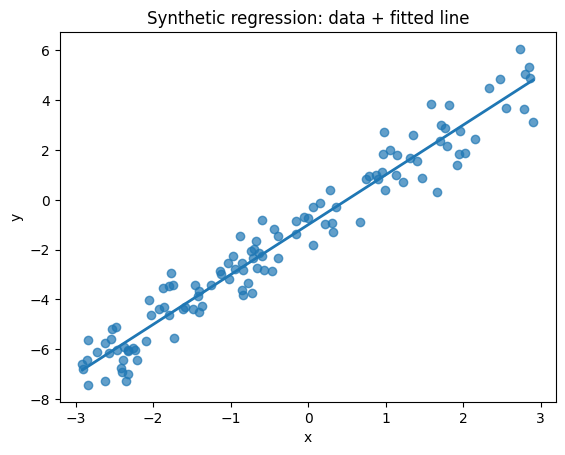

In [3]:
# Synthetic example: "learning from data" in regression
# We generate data from an underlying rule and fit a model to recover it.

n = 120
X = rng.uniform(-3, 3, size=(n, 1))
noise = rng.normal(0, 0.8, size=n)
y = 2.0 * X[:, 0] - 1.0 + noise

# Fit a linear model (ordinary least squares)
lr = LinearRegression()
lr.fit(X, y)

print("Learned slope:", float(lr.coef_[0]))
print("Learned intercept:", float(lr.intercept_))

# Visualize
x_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_hat = lr.predict(x_grid)

plt.figure()
plt.scatter(X[:, 0], y, alpha=0.7)
plt.plot(x_grid[:, 0], y_hat, linewidth=2)
plt.title("Synthetic regression: data + fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## شهود بیش‌برازش

پیچیدگی مدل (درجهٔ چندجمله‌ای) را تغییر می‌دهیم و خطای آموزش و آزمون را مقایسه می‌کنیم.


In [4]:
# Overfitting demonstration: polynomial features can overfit small/noisy data.
# We'll compare training vs test error as polynomial degree increases.

import math
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=SEED)

degrees = list(range(1, 13))
train_rmse = []
test_rmse = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    Xtr = poly.fit_transform(X_train)
    Xte = poly.transform(X_test)

    model = LinearRegression()
    model.fit(Xtr, y_train)

    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)

    tr = math.sqrt(mean_squared_error(y_train, ytr_pred))
    te = math.sqrt(mean_squared_error(y_test, yte_pred))
    train_rmse.append(tr)
    test_rmse.append(te)

pd.DataFrame({"degree": degrees, "train_RMSE": train_rmse, "test_RMSE": test_rmse}).head(8)


,degree,train_RMSE,test_RMSE
0,1,0.734534,0.875897
1,2,0.731574,0.899197
2,3,0.726079,0.919933
3,4,0.725813,0.922541
4,5,0.724883,0.930759
5,6,0.717615,0.943154
6,7,0.710067,0.906309
7,8,0.706914,0.884290


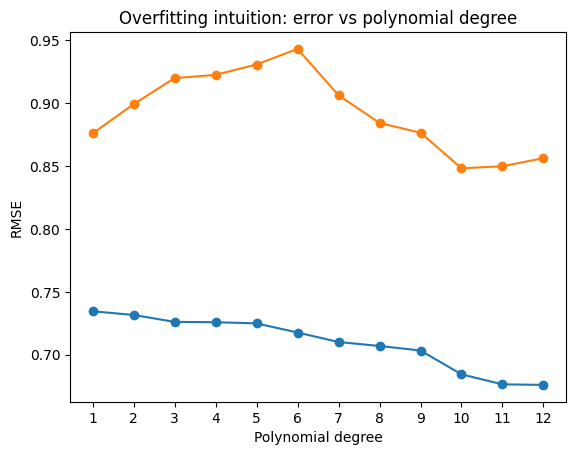

Degree with lowest test RMSE (in this run): 10


In [5]:
# Plot train vs test RMSE (default matplotlib styling; no manual colors)
plt.figure()
plt.plot(degrees, train_rmse, marker="o")
plt.plot(degrees, test_rmse, marker="o")
plt.title("Overfitting intuition: error vs polynomial degree")
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.show()

best_degree = degrees[int(np.argmin(test_rmse))]
print("Degree with lowest test RMSE (in this run):", best_degree)


## تعمیق شهود (اختیاری اما توصیه‌شده)

این بخش عمداً طولانی است، چون معمولاً همین‌جا ذهنیت درست برای مبتدی‌ها ساخته می‌شود.
اگر از قبل راحت هستید، مرور سریع کافی است و می‌توانید روی سلول‌های کد تمرکز کنید.

### ۱) دقیقاً چه چیزی «یاد گرفته می‌شود»؟

وقتی می‌گوییم «مدل یاد می‌گیرد»، یعنی:

- یک قالب تابع انتخاب می‌کنیم (مثلاً تابع خطی):
  \[
  \hat{y} = w^T x + b
  \]
- الگوریتم یادگیری پارامترهای \(w, b\) را طوری پیدا می‌کند که زیان را کمینه کند؛ مثلاً MSE:
  \[
  \min_{w,b} \frac{1}{n}\sum_{i=1}^n (y_i - (w^T x_i + b))^2
  \]
- بعد از آموزش، با جایگذاری \(x\)های جدید در تابع برازش‌شده، پیش‌بینی تولید می‌شود.

هیچ جادویی در کار نیست: ML در اصل **برازش تابع** به‌علاوهٔ ارزیابی دقیق است.  
قدرت آن از این می‌آید که کلاس‌های تابع می‌توانند بسیار بیان‌گر باشند و بهینه‌سازی می‌تواند مقیاس‌پذیر باشد.

### ۲) چرا تعمیم‌پذیری سخت است؟

چون شما تنها یک نمونهٔ محدود از جهان را می‌بینید.

حتی اگر دادهٔ آموزش را کامل برازش کنید، توابع زیادی وجود دارند که همین کار را می‌کنند.
برای تعمیم، شما به **سوگیری استقرایی** نیاز دارید: فرض‌هایی دربارهٔ اینکه توابع «معقول» چه شکلی هستند.
نمونه‌هایی از سوگیری استقرایی:

- مدل‌های خطی رابطهٔ تقریباً خطی را فرض می‌کنند.
- منظم‌سازی (مثل L2) فرض می‌کند وزن‌های کوچک‌تر ترجیح دارند.
- درخت تصمیم فرض می‌کند جهان را می‌توان با قوانین if-then بخش‌بندی کرد.
- k-NN فرض می‌کند ورودی‌های مشابه خروجی‌های مشابه دارند.

سوگیری استقرایی نقص نیست؛ ضرورت است. بدون آن، یادگیری مسئله‌ای بدتعریف خواهد بود.

### ۳) داده بخشی از مدل است

یک گزارهٔ عملی که خیلی‌ها را غافلگیر می‌کند:

> دیتاست و فرایند برچسب‌گذاری بخشی از مدل شماست.

اگر برچسب‌ها ناسازگار باشند، با «مدل‌کردن» مشکل حل نمی‌شود.
اگر تقسیم train/test اطلاعات آینده را نشت دهد، ارزیابی شما غیرواقعی بهتر خواهد شد.
اگر دادهٔ آموزش با دادهٔ زمان استقرار فرق کند (جابجایی توزیع)، عملکرد افت می‌کند.

به همین دلیل در عمل رویکرد «داده‌محور» اهمیت دارد:
اغلب با بهبود کیفیت داده، سود بیشتری نسبت به پیچیده‌تر کردن الگوریتم می‌گیرید.

### ۴) معیارها بیان می‌کنند چه چیزی مهم است

معیارها صرفاً عدد نیستند؛ تعریف موفقیت‌اند.

- Accuracy زمانی خوب است که کلاس‌ها متعادل و هزینه‌ها متقارن باشند.
- Precision/Recall زمانی مهم‌اند که هزینهٔ خطاها متفاوت باشد.
- انتخاب MAE در برابر RMSE تعیین می‌کند خطاهای بزرگ را چقدر شدید جریمه کنید.

جریان کاری خوب معیار را صریح انتخاب می‌کند و آن را با کاربرد هم‌راستا نگه می‌دارد.

### ۵) یک جریان کاری حداقلی اما درست (الگوی تکرارشونده)

برای اکثر مسائل جدولی، یک الگوی خط‌پایهٔ قوی این است:

۱. داده را بارگذاری کنید و هدف را دقیق تعیین کنید.  
۲. به train/test تقسیم کنید (و در صورت نیاز validation).  
۳. یک پایپ‌لاین پیش‌پردازش بسازید:
   - برآورد داده‌های گمشده،
   - کدگذاری متغیرهای دسته‌ای،
   - مقیاس‌بندی (در صورت نیاز).  
۴. یک مدل خط‌پایه آموزش دهید.  
۵. روی مجموعهٔ آزمون ارزیابی کنید.  
۶. تکرار: مهندسی ویژگی، انتخاب مدل، ابرپارامترها، و ارزیابی بهتر.

کد این نوت‌بوک همین الگو را به‌شکلی پیاده می‌کند که با انواع داده سازگار باشد.

### ۶) سوءبرداشت‌های رایج در ابتدای مسیر

- «اگر دقتِ آموزش بالا باشد، مدل خوب است.»  
  لزوماً نه؛ ممکن است بیش‌برازش باشد.

- «اگر به اندازهٔ کافی تنظیم کنم، هر خط‌پایه‌ای را شکست می‌دهم.»  
  فقط اگر ارزیابی درست باشد و داده واقعاً اجازه دهد.

- «ویژگی بیشتر همیشه بهتر است.»  
  ویژگی‌های نامرتبط می‌توانند ضرر بزنند و ریسک نشت داده را افزایش دهند.

- «یک بار تقسیم کافی است.»  
  اغلب کافی نیست. در صورت امکان از cross-validation استفاده کنید (و ناپایداری داده‌های خیلی کوچک را در نظر بگیرید).

### ۷) چرا از پایپ‌لاین استفاده کردیم؟

پایپ‌لاین یک نظم اجباری ایجاد می‌کند:

- مراحل پیش‌پردازش فقط روی train fit می‌شوند،
- همان تبدیل‌ها روی test اعمال می‌شود،
- احتمال نشت داده کاهش می‌یابد.

در فصل‌های بعد، پایپ‌لاین‌ها روش استاندارد ساخت سامانه‌های قابل اعتماد خواهند بود.

---

اگر این بخش را خوب فهمیدید، پایهٔ لازم برای ورود به پیش‌پردازش و EDA در فصل‌های ۲ و ۳ را دارید.


## انتخاب و بارگذاری تصادفی دیتاست‌ها

اکنون دیتاست‌ها (طبقه‌بندی، رگرسیون، خوشه‌بندی) را با استفاده از seed به‌صورت قطعی انتخاب می‌کنیم.


In [6]:
# Helper: load CSV from repository path, otherwise use embedded sample text.

SAMPLES = {
    "../../../Datasets/Classification/diabetes.csv": "Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,classification\n6,148,72,35,0,33.6,0.627,50,Diabetic\n1,85,66,29,0,26.6,0.351,31,Non-Diabetic\n8,183,64,0,0,23.3,0.672,32,Diabetic\n1,89,66,23,94,28.1,0.167,21,Non-Diabetic\n0,137,40,35,168,43.1,2.288,33,Diabetic\n",
    "../../../Datasets/Classification/drug200.csv": "Age,Sex,BP,Cholesterol,Na_to_K,Drug\n23,F,HIGH,HIGH,25.355,DrugY\n47,M,LOW,HIGH,13.093,drugC\n47,M,LOW,HIGH,10.114,drugC\n28,F,NORMAL,HIGH,7.798,drugX\n61,F,LOW,HIGH,18.043,DrugY\n22,F,NORMAL,HIGH,8.607,drugX\n",
    "../../../Datasets/Classification/Fast_Food_Restaurants_US.csv": ",address,categories,city,country,latitude,longitude,name,postalCode,province,websites\n0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,\"https://locations.sonicdrivein.com/la/thibodaux/800-north-canal-boulevard.html,http://sonicdrivein.com,http://www.sonicdrivein.com\"\n1,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,\"https://locations.sonicdrivein.com/la/thibodaux/800-north-canal-boulevard.html,http://sonicdrivein.com,http://www.sonicdrivein.com\"\n2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN,\"http://www.tacobell.com,https://locations.tacobell.com/tn/pigeon-forge/206-wears-valley-road.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=026432andutm_content=website\"\n3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN,\"http://www.arbys.com,https://locations.arbys.com/us/tn/pigeon-forge/3652-parkway.html\"\n4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA,http://www.steaknshake.com/locations/23851-steak-n-shake-mt-zion-parkway-morrow\n5,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,42.368823,-83.138251,Wendy's,48204,MI,http://www.wendys.com\n",
    "../../../Datasets/Classification/fish.csv": "Species,Weight,Length1,Length2,Length3,Height,Width\nBream,242,23.2,25.4,30,11.52,4.02\nBream,290,24,26.3,31.2,12.48,4.3056\nBream,340,23.9,26.5,31.1,12.3778,4.6961\nBream,363,26.3,29,33.5,12.73,4.4555\nBream,430,26.5,29,34,12.444,5.134\n",
    "../../../Datasets/Classification/glass.csv": "RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type\n1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed\n1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed\n1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed\n1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed\n1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed\n1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_windows_float_processed\n",
    "../../../Datasets/Classification/iris.csv": "sepal_length,sepal_width,petal_length,petal_width,classification\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3,1.4,0.1,Iris-setosa\n4.3,3,1.1,0.1,Iris-setosa\n5.8,4,1.2,0.2,Iris-setosa\n",
    "../../../Datasets/Classification/stars.csv": "Temperature,L,R,A_M,Color,Spectral_Class,Type\n3068,0.0024,0.17,16.12,Red,M,Red Dwarf\n3042,0.0005,0.1542,16.6,Red,M,Red Dwarf\n2600,0.0003,0.102,18.7,Red,M,Red Dwarf\n2800,0.0002,0.16,16.65,Red,M,Red Dwarf\n1939,0.000138,0.103,20.06,Red,M,Red Dwarf\n",
    "../../../Datasets/Classification/Wine_Quality.csv": "fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6\n6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6\n8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6\n7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6\n7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6\n8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6\n",
    "../../../Datasets/Clustering/airports.csv": "\"id\",\"ident\",\"type\",\"name\",\"latitude_deg\",\"longitude_deg\",\"elevation_ft\",\"continent\",\"iso_country\",\"iso_region\",\"municipality\",\"scheduled_service\",\"icao_code\",\"iata_code\",\"gps_code\",\"local_code\",\"home_link\",\"wikipedia_link\",\"keywords\"\n6523,\"00A\",\"heliport\",\"Total RF Heliport\",40.070985,-74.933689,11,\"NA\",\"US\",\"US-PA\",\"Bensalem\",\"no\",,,\"K00A\",\"00A\",\"https://www.penndot.pa.gov/TravelInPA/airports-pa/Pages/Total-RF-Heliport.aspx\",,\n323361,\"00AA\",\"small_airport\",\"Aero B Ranch Airport\",38.704022,-101.473911,3435,\"NA\",\"US\",\"US-KS\",\"Leoti\",\"no\",,,\"00AA\",\"00AA\",,,\n6524,\"00AK\",\"small_airport\",\"Lowell Field\",59.947733,-151.692524,450,\"NA\",\"US\",\"US-AK\",\"Anchor Point\",\"no\",,,\"00AK\",\"00AK\",,,\n6525,\"00AL\",\"small_airport\",\"Epps Airpark\",34.86479949951172,-86.77030181884766,820,\"NA\",\"US\",\"US-AL\",\"Harvest\",\"no\",,,\"00AL\",\"00AL\",,,\n506791,\"00AN\",\"small_airport\",\"Katmai Lodge Airport\",59.093287,-156.456699,80,\"NA\",\"US\",\"US-AK\",\"King Salmon\",\"no\",,,\"00AN\",\"00AN\",,,\n322127,\"00AS\",\"small_airport\",\"Fulton Airport\",34.9428028,-97.8180194,1100,\"NA\",\"US\",\"US-OK\",\"Alex\",\"no\",,,\"00AS\",\"00AS\",,,\n",
    "../../../Datasets/Clustering/ConsumerComplaints.csv": "Date Received,Product Name,Sub Product,Issue,Sub Issue,Consumer Complaint Narrative,Company Public Response,Company,State Name,Zip Code,Tags,Consumer Consent Provided,Submitted via,Date Sent to Company,Company Response to Consumer,Timely Response,Consumer Disputed,Complaint ID\n2013-07-29,Consumer Loan,Vehicle loan,Managing the loan or lease,,,,Wells Fargo & Company,VA,24540,,N/A,Phone,2013-07-30,Closed with explanation,Yes,No,468882\n2013-07-29,Bank account or service,Checking account,Using a debit or ATM card,,,,Wells Fargo & Company,CA,95992,Older American,N/A,Web,2013-07-31,Closed with explanation,Yes,No,468889\n2013-07-29,Bank account or service,Checking account,\"Account opening, closing, or management\",,,,Santander Bank US,NY,10065,,N/A,Fax,2013-07-31,Closed,Yes,No,468879\n2013-07-29,Bank account or service,Checking account,Deposits and withdrawals,,,,Wells Fargo & Company,GA,30084,,N/A,Web,2013-07-30,Closed with explanation,Yes,No,468949\n2013-07-29,Mortgage,Conventional fixed mortgage,\"Loan servicing, payments, escrow account\",,,,Franklin Credit Management,CT,6106,,N/A,Web,2013-07-30,Closed with explanation,Yes,No,475823\n",
    "../../../Datasets/Clustering/hw_200.csv": "\"Index\", Height(Inches)\", \"Weight(Pounds)\"\n1, 65.78, 112.99\n2, 71.52, 136.49\n3, 69.40, 153.03\n4, 68.22, 142.34\n5, 67.79, 144.30\n6, 68.70, 123.30\n",
    "../../../Datasets/Regression/cognitive.csv": "kid_score,mom_hs,mom_iq,mom_work,mom_age\n65,yes,121.1175286,yes,27\n98,yes,89.36188171,yes,25\n85,yes,115.4431649,yes,27\n83,yes,99.44963944,yes,25\n115,yes,92.74571,yes,27\n98,no,107.9018378,no,18\n",
    "../../../Datasets/Regression/diamonds.csv": "\"id\",\"carat\",\"cut\",\"color\",\"clarity\",\"depth\",\"table\",\"price\",\"x\",\"y\",\"z\"\n\"1\",0.23,\"Ideal\",\"E\",\"SI2\",61.5,55,326,3.95,3.98,2.43\n\"2\",0.21,\"Premium\",\"E\",\"SI1\",59.8,61,326,3.89,3.84,2.31\n\"3\",0.23,\"Good\",\"E\",\"VS1\",56.9,65,327,4.05,4.07,2.31\n\"4\",0.29,\"Premium\",\"I\",\"VS2\",62.4,58,334,4.2,4.23,2.63\n\"5\",0.31,\"Good\",\"J\",\"SI2\",63.3,58,335,4.34,4.35,2.75\n\"6\",0.24,\"Very Good\",\"J\",\"VVS2\",62.8,57,336,3.94,3.96,2.48\n",
    "../../../Datasets/Regression/earthquake.csv": "date,time,latitude,longitude,depth,magnitude\n2008-11-01,00:31:25,-0.6,98.89553,20.0,2.99\n2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51\n2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54\n2008-11-01,02:20:05,-4.2,128.097,5.0,2.42\n2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41\n",
    "../../../Datasets/Regression/European_Ski_Resorts.csv": ",\"Resort\",\"Country\",\"HighestPoint\",\"LowestPoint\",\"DayPassPriceAdult\",\"BeginnerSlope\",\"IntermediateSlope\",\"DifficultSlope\",\"TotalSlope\",\"Snowparks\",\"NightSki\",\"SurfaceLifts\",\"ChairLifts\",\"GondolaLifts\",\"TotalLifts\",\"LiftCapacity\",\"SnowCannons\"\n\"1\",\"Alpendorf (Ski amed\u00e9)\",\"Austria\",1980,740,52,30,81,4,115,\"Yes\",\"No\",22,16,11,49,75398,600\n\"2\",\"Soldeu-Pas de la Casa/\u200bGrau Roig/\u200bEl Tarter/\u200bCanillo/\u200bEncamp (Grandvalira)\",\"Andorra\",2640,1710,47,100,77,33,210,\"Yes\",\"Yes\",37,28,7,72,99017,1032\n\"3\",\"Oberau (Wildscho\u0308nau)\",\"Austria\",1130,900,30,1,0,1,2,\"No\",\"No\",2,0,0,2,1932,0\n\"4\",\"Dachstein West\",\"Austria\",1620,780,42,15,33,3,51,\"Yes\",\"Yes\",25,8,3,36,32938,163\n\"5\",\"Rosa Khutor\",\"Southern Russia\",2320,940,22,30,26,21,77,\"Yes\",\"No\",6,11,10,27,49228,450\n",
    "../../../Datasets/Regression/house-prices.csv": "Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood\n1,114300,1790,2,2,2,No,East\n2,114200,2030,4,2,3,No,East\n3,114800,1740,3,2,1,No,East\n4,94700,1980,3,2,3,No,East\n5,119800,2130,3,3,3,No,East\n",
    "../../../Datasets/Regression/listings.csv": "id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license\n13913,Holiday London DB Room Let-on going,54730,Alina,,Islington,51.56861,-0.1127,Private room,57,1,51,2025-02-09,0.29,3,344,10,\n15400,Bright Chelsea  Apartment. Chelsea!,60302,Philippa,,Kensington and Chelsea,51.4878,-0.16813,Entire home/apt,,4,96,2024-04-28,0.52,1,11,2,\n17402,Very Central Modern 3-Bed/2 Bath By Oxford St W1,67564,Liz,,Westminster,51.52195,-0.14094,Entire home/apt,510,3,56,2024-02-19,0.33,5,293,0,\n24328,Battersea live/work artist house,41759,Joe,,Wandsworth,51.47072,-0.16266,Entire home/apt,213,90,94,2022-07-19,0.54,1,194,0,\n31036,Bright  compact 1 Bedroom Apartment Brick Lane,133271,Hendryks,,Tower Hamlets,51.52425,-0.06997,Entire home/apt,100,2,126,2025-02-20,0.70,8,353,3,\n",
    "../../../Datasets/Regression/NYC_Collisions.csv": "COLLISION_ID,ACCIDENT_DATE,ACCIDENT_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,STREET NAME,CROSS STREET NAME,FULL ADDRESS,VEHICLE TYPE,CONTRIBUTING FACTOR,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLIST INJURED,CYCLIST KILLED,MOTORIST INJURED,MOTORIST KILLED\n4380785,2021-01-01,00:00:00,QUEENS,11434,40.664536,-73.77314,,,145-8     175 STREET,Station Wagon/Sport Utility Vehicle,Unspecified,0,0,0,0,0,0,0,0\n4380974,2021-01-01,00:00:00,QUEENS,11355,40.754375,-73.8234,BEECH AVENUE,KISSENA BOULEVARD,,Sedan,Unspecified,0,0,0,0,0,0,0,0\n4381080,2021-01-01,00:00:00,BROOKLYN,11203,40.658295,-73.93109,UTICA AVENUE,WINTHROP STREET,,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,1,0,0,0,0,0,1,0\n4381095,2021-01-01,00:00:00,BROOKLYN,11212,40.661873,-73.92878,,,108       EAST 91 STREET,Sedan,Unspecified,0,0,0,0,0,0,0,0\n4381962,2021-01-01,00:00:00,,,40.834198,-73.85169,WESTCHESTER AVENUE,,,Sedan,Unspecified,1,0,1,0,0,0,0,0\n",
    "../../../Datasets/Regression/salaries.csv": "Name,Age,Job,Salary\nKevin Sanders,24,Software Engineer,7300\nLisa Mills,26,High School Teacher,6100\nDonna Allison,27,Dentist,12700\nMichael Schmitt,43,Dentist,17500\nLisa Shaffer,31,Accountant,7400\n",
    "../../../Datasets/Regression/states_all.csv": "PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE\n1992_ALABAMA,ALABAMA,1992,,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,,,731634.0,208.0,252.0,207.0,\n1992_ALASKA,ALASKA,1992,,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,,,122487.0,,,,\n1992_ARIZONA,ARIZONA,1992,,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,,,673477.0,215.0,265.0,209.0,\n1992_ARKANSAS,ARKANSAS,1992,,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,,,441490.0,210.0,256.0,211.0,\n",
}


def load_csv_or_sample(rel_path: str) -> pd.DataFrame:
    p = Path(rel_path)
    if p.exists():
        df = pd.read_csv(p)
        print(f"Loaded from file: {rel_path} | shape={df.shape}")
        return df
    sample = SAMPLES.get(rel_path)
    if sample is None:
        raise FileNotFoundError(f"No file at {rel_path} and no embedded sample available.")
    df = pd.read_csv(StringIO(sample))
    print(f"File not found at: {rel_path} -> using embedded sample | shape={df.shape}")
    return df

# Datasets to choose from (grouped by task)
CLASSIFICATION_PATHS = [
    "../../../Datasets/Classification/diabetes.csv",
    "../../../Datasets/Classification/drug200.csv",
    "../../../Datasets/Classification/iris.csv",
    "../../../Datasets/Classification/glass.csv",
    "../../../Datasets/Classification/stars.csv",
]
REGRESSION_PATHS = [
    "../../../Datasets/Regression/house-prices.csv",
    "../../../Datasets/Regression/diamonds.csv",
    "../../../Datasets/Regression/salaries.csv",
    "../../../Datasets/Regression/earthquake.csv",
    "../../../Datasets/Regression/cognitive.csv",
]
CLUSTERING_PATHS = [
    "../../../Datasets/Clustering/airports.csv",
    "../../../Datasets/Clustering/hw_200.csv",
    "../../../Datasets/Clustering/ConsumerComplaints.csv",
]

# Make selection deterministic per lesson
import random
random.seed(SEED)
cls_path = random.choice(CLASSIFICATION_PATHS)
reg_path = random.choice(REGRESSION_PATHS)
clu_path = random.choice(CLUSTERING_PATHS)

print("Selected classification dataset:", cls_path)
print("Selected regression dataset:", reg_path)
print("Selected clustering dataset:", clu_path)


Selected classification dataset: ../../../Datasets/Classification/diabetes.csv
Selected regression dataset: ../../../Datasets/Regression/diamonds.csv
Selected clustering dataset: ../../../Datasets/Clustering/airports.csv


In [7]:
# Load and preview selected datasets
df_cls = load_csv_or_sample(cls_path)
df_reg = load_csv_or_sample(reg_path)
df_clu = load_csv_or_sample(clu_path)

display(df_cls.head())
display(df_reg.head())
display(df_clu.head())


File not found at: ../../../Datasets/Classification/diabetes.csv -> using embedded sample | shape=(5, 9)
File not found at: ../../../Datasets/Regression/diamonds.csv -> using embedded sample | shape=(6, 11)
File not found at: ../../../Datasets/Clustering/airports.csv -> using embedded sample | shape=(6, 19)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,classification
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80,NaN,US,US-AK,King Salmon,no,NaN,NaN,00AN,00AN,NaN,NaN,NaN


## ۵.۱ مینی‌پروژهٔ طبقه‌بندی (پایان‌به‌پایان)

طبقه‌بندی را این‌گونه در نظر می‌گیریم: «پیش‌بینی یک برچسب گسسته از روی ویژگی‌های ورودی».

چون مخزن شما چندین دیتاست طبقه‌بندی با ساختارهای متفاوت دارد، یک پایپ‌لاین مقاوم می‌سازیم:

- جدا کردن **ویژگی‌ها** از **هدف**.
- تشخیص ستون‌های عددی در برابر دسته‌ای.
- برآورد مقادیر گمشده (روش ساده).
- One-Hot برای ویژگی‌های دسته‌ای.
- آموزش یک مدل خط‌پایه (Logistic Regression) و ارزیابی.

**بهداشت ارزیابی**:
- استفاده از مجموعهٔ آزمون نگه‌داشته‌شده.
- گزارش بیش از یک معیار (accuracy و macro-F1).
- نمایش confusion matrix و گزارش طبقه‌بندی.


In [8]:
# --- Classification pipeline ---
# Heuristic: target column name is either 'classification', 'Drug', or 'Type' for our included samples.
possible_targets = ["classification", "Drug", "Type"]
target_col = next((c for c in possible_targets if c in df_cls.columns), None)
if target_col is None:
    # Fallback: last column
    target_col = df_cls.columns[-1]

Xc = df_cls.drop(columns=[target_col])
yc = df_cls[target_col]

# Detect column types
num_cols = Xc.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in Xc.columns if c not in num_cols]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000, random_state=SEED)),
])

class_counts = yc.value_counts()
use_stratify = (yc.nunique() > 1) and (class_counts.min() >= 2)
X_train, X_test, y_train, y_test = train_test_split(
    Xc, yc, test_size=0.3, random_state=SEED, stratify=yc if use_stratify else None
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro") if y_test.nunique() > 1 else float("nan")

print("Target column:", target_col)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)
print("Accuracy:", acc)
print("Macro-F1:", f1)
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=[f"true_{c}" for c in np.unique(y_test)],
             columns=[f"pred_{c}" for c in np.unique(y_test)])


Target column: classification
Train shape: (3, 8) | Test shape: (2, 8)
Accuracy: 0.5
Macro-F1: 0.3333333333333333

Classification report:
               precision    recall  f1-score   support

    Diabetic       0.00      0.00      0.00         1
Non-Diabetic       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



,pred_Diabetic,pred_Non-Diabetic
true_Diabetic,0,1
true_Non-Diabetic,0,1


In [9]:
# Cross-validation (safe for small / imbalanced samples)
# For very small datasets, CV can be unstable or impossible. We adapt cv based on class counts.

from sklearn.model_selection import StratifiedKFold

try:
    counts = yc.value_counts()
    min_count = int(counts.min()) if yc.nunique() > 1 else 0

    if yc.nunique() < 2:
        print("CV skipped: only one class present in the dataset.")
    elif min_count < 2:
        print("CV skipped: at least one class has fewer than 2 samples (cannot stratify reliably).")
    else:
        cv_splits = min(3, min_count)
        skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
        scores = cross_val_score(clf, Xc, yc, cv=skf, scoring="accuracy")
        print(f"{cv_splits}-fold CV accuracy:", scores, "| mean:", scores.mean())
except Exception as e:
    print("CV could not be computed for this dataset:", repr(e))


2-fold CV accuracy:

 [0.66666667 0.5       ] | mean: 0.5833333333333333


## ۵.۲ مینی‌پروژهٔ رگرسیون

رگرسیون یعنی: «پیش‌بینی یک هدف عددی (پیوسته)».

پایپ‌لاین مشابهی می‌سازیم اما از معیارهای رگرسیون استفاده می‌کنیم:

- MAE (میانگین قدر مطلق خطا): متوسط فاصلهٔ قدر مطلق.
- RMSE (ریشهٔ میانگین مربعات خطا): خطاهای بزرگ را بیشتر جریمه می‌کند.

برای شفافیت و سرعت، از Linear Regression به‌عنوان خط‌پایه استفاده می‌کنیم.  
در فصل‌های بعد، روش‌های درختی و boosting را برای الگوهای غیرخطی یاد خواهید گرفت.


Target column: z
Train shape: (4, 10) | Test shape: (2, 10)
MAE: 0.013254173750704146
RMSE: 0.01747996371289287


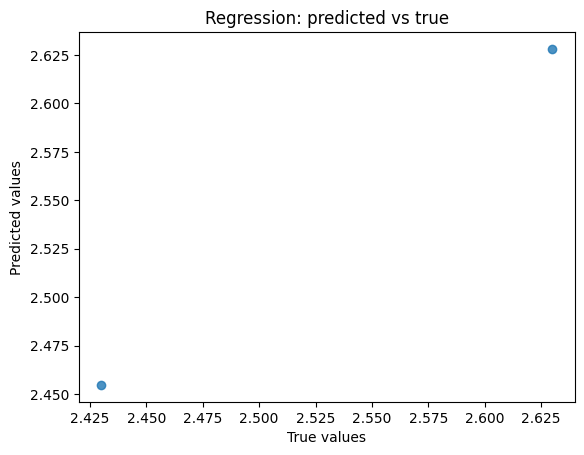

In [10]:
# --- Regression pipeline ---
# Heuristic target: if 'Price' or 'Salary' exists use it; else use last numeric column.
reg_targets = ["Price", "Salary", "magnitude", "kid_score"]
target_r = next((c for c in reg_targets if c in df_reg.columns), None)

if target_r is None:
    numeric_cols = df_reg.select_dtypes(include=[np.number]).columns.tolist()
    target_r = numeric_cols[-1] if numeric_cols else df_reg.columns[-1]

Xr = df_reg.drop(columns=[target_r])
yr = df_reg[target_r]

num_cols_r = Xr.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_r = [c for c in Xr.columns if c not in num_cols_r]

preprocess_r = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler())]), num_cols_r),
        ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                          ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_cols_r),
    ],
    remainder="drop"
)

reg_model = Pipeline(steps=[
    ("preprocess", preprocess_r),
    ("model", LinearRegression()),
])

X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.3, random_state=SEED)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("Target column:", target_r)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)
print("MAE:", mae)
print("RMSE:", rmse)

# Scatter plot of predictions vs true values (small samples are fine for demonstration)
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.8)
plt.title("Regression: predicted vs true")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


## ۵.۳ مینی‌پروژهٔ خوشه‌بندی

خوشه‌بندی اقلام را بر اساس شباهت گروه‌بندی می‌کند، بدون اینکه برچسب داشته باشیم.

از آنجا که دیتاست‌های خوشه‌بندی ممکن است ستون‌های عددی و دسته‌ای را با هم داشته باشند، ما:

- در صورت امکان چند ویژگی عددی انتخاب می‌کنیم،
- ویژگی‌ها را استاندارد می‌کنیم،
- k-means را با k کوچک (به‌طور پیش‌فرض k=3) اجرا می‌کنیم،
- مراکز خوشه را در فضای استاندارد بررسی می‌کنیم.

هشدار مهم:
- خوشه‌بندی ماهیتاً اکتشافی است؛ اغلب «حقیقت مرجع» وجود ندارد.
- معیارهایی مثل silhouette کمک می‌کنند، اما باید با احتیاط تفسیر شوند.


In [11]:
# --- Clustering pipeline ---
# Pick numeric columns; if none, try to coerce numeric columns from text.

df = df_clu.copy()

# Attempt to coerce numeric columns where possible (useful for CSVs with quoted numerics)
for col in df.columns:
    if df[col].dtype == object:
        cleaned = df[col].astype(str).str.replace('"', '').str.strip()
        converted = pd.to_numeric(cleaned, errors="coerce")
# Convert only if we actually obtained a meaningful amount of numeric values
# (prevents destroying purely categorical columns).
non_na = int(converted.notna().sum())
if non_na >= max(3, int(0.6 * len(converted))):
    df[col] = converted
else:
    df[col] = cleaned

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(num_cols) == 0:
    raise ValueError("No numeric columns found for clustering in the selected dataset.")

# Use up to 4 numeric columns to keep it simple and interpretable
use_cols = num_cols[:4]
X = df[use_cols].copy()

# Impute and scale
X_imp = SimpleImputer(strategy="median").fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imp)

k = 3
kmeans = KMeans(n_clusters=k, random_state=SEED, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df_out = df[use_cols].copy()
df_out["cluster"] = labels
display(df_out.head())

centers = pd.DataFrame(kmeans.cluster_centers_, columns=use_cols)
print("Cluster centers (standardized space):")
centers


,id,latitude_deg,longitude_deg,elevation_ft,cluster
0,6523,40.070985,-74.933689,11,2
1,323361,38.704022,-101.473911,3435,0
2,6524,59.947733,-151.692524,450,1
3,6525,34.864799,-86.770302,820,2
4,506791,59.093287,-156.456699,80,1


Cluster centers (standardized space):


,id,latitude_deg,longitude_deg,elevation_ft
0,0.641983,-0.726107,0.379665,1.106024
1,0.309058,1.392069,-1.360043,-0.617790
2,-0.951041,-0.665962,0.980378,-0.488234


## ۶. مبانی بازتولیدپذیری

بازتولیدپذیری در ML اختیاری نیست؛ راه جلوگیری از شکست‌های «یک بار کار کرد» است.

حداقل باید این موارد را کنترل کنید:

- بذرهای تصادفی (تقسیم داده، مقداردهی اولیهٔ مدل).
- نسخهٔ دقیق داده (محتوای فایل، مراحل پیش‌پردازش).
- نسخهٔ بسته‌ها (پایتون، NumPy، scikit-learn، و ...).
- پروتکل ارزیابی (train/validation/test دقیقاً چیست و چگونه انتخاب شده؟)

در این نوت‌بوک:
- یک بذر قطعی بر اساس (فصل، درس) تنظیم می‌کنیم،
- نسخهٔ بسته‌ها را چاپ می‌کنیم،
- مسیر دقیق دادهٔ انتخاب‌شده را نمایش می‌دهیم.


In [12]:
# Saving a small artifact (model) to demonstrate reproducibility mechanics
# In real projects, you would version models and metadata more carefully.

import joblib, os

artifact_dir = Path("./_artifacts_demo")
artifact_dir.mkdir(exist_ok=True)

model_path = artifact_dir / "classification_model.joblib"
joblib.dump(clf, model_path)

print("Saved model artifact to:", model_path.resolve())
print("File size (bytes):", os.path.getsize(model_path))


Saved model artifact to: /mnt/data/Tutorials/Persian/Chapter1/_artifacts_demo/classification_model.joblib
File size (bytes): 3703


## جمع‌بندی

اکنون باید یک تعریف عملی از یادگیری ماشین داشته باشید:

- فرایند **یادگیری یک تابع پیش‌بینی از داده** است.
- هدف مرکزی **تعمیم‌پذیری** است، نه حفظ کردن داده.
- ارزیابی صحیح و بهداشت داده (تقسیم‌ها، جلوگیری از نشت داده) از همان روز اول حیاتی است.

### تمرین‌ها (پیشنهادی)

۱. مقدار seed را تغییر دهید و انتخاب داده را دوباره اجرا کنید. آیا نتایج تغییر می‌کند؟  
۲. برای دادهٔ طبقه‌بندی:
   - Logistic Regression را با Decision Tree و Random Forest مقایسه کنید.
   - تغییرات accuracy، precision، recall و confusion matrix را ثبت کنید.
۳. برای دادهٔ رگرسیون:
   - یک خط‌پایهٔ ساده اضافه کنید: پیش‌بینی میانگین هدف در دادهٔ آموزش.
   - MAE آن را با MAE رگرسیون خطی مقایسه کنید.
۴. برای دادهٔ خوشه‌بندی:
   - مقدارهای مختلف *k* را امتحان کنید و silhouette score را محاسبه کنید.
   - توضیح دهید کدام k منطقی‌تر است و چرا.

### مطالعهٔ تکمیلی (اختیاری)
- مستندات scikit-learn: pipelines، پیش‌پردازش، و ارزیابی مدل.
- هر منبع مقدماتی که روی ارزیابی و تعمیم‌پذیری تاکید دارد.
